In [ ]:
pip install -U scikit-image


# Fast Fourier Transform

In Python, we could utilize Numpy - [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.html) to implement FFT operation easily.





In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
from skimage import data

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


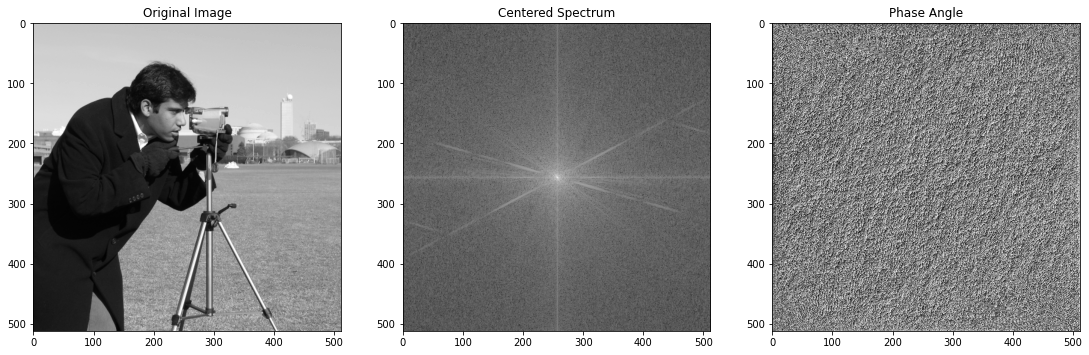

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# img = cv2.imread("left01.jpg", 0)
img = data.camera()
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

# fft2() Compute the 2-dimensional discrete Fourier Transform.
original = np.fft.fft2(img)
# plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

# fftshift(): Shift the zero-frequency component to the center of the spectrum.
center = np.fft.fftshift(original)
plt.subplot(152), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

plt.subplot(153), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

plt.show()

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Filtro Gaussiano

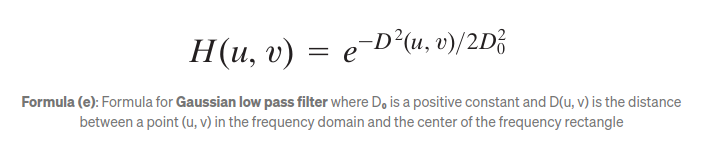

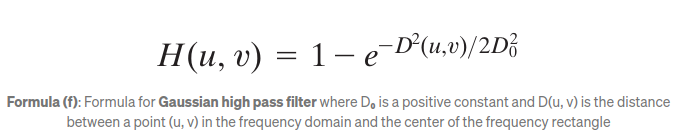


In [ ]:
# source: https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

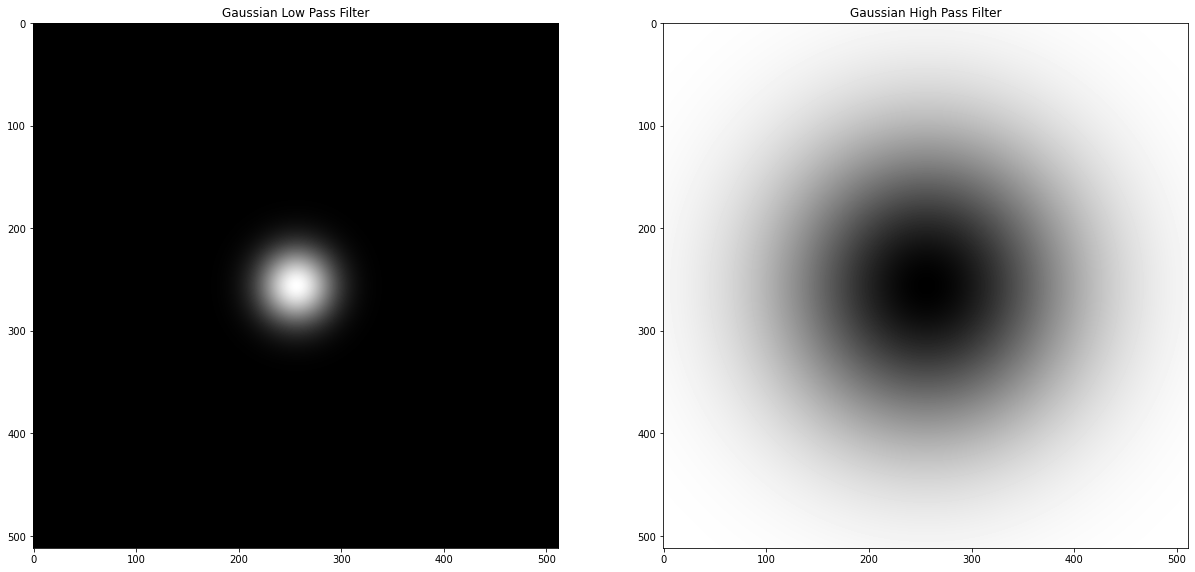

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(25,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(100,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

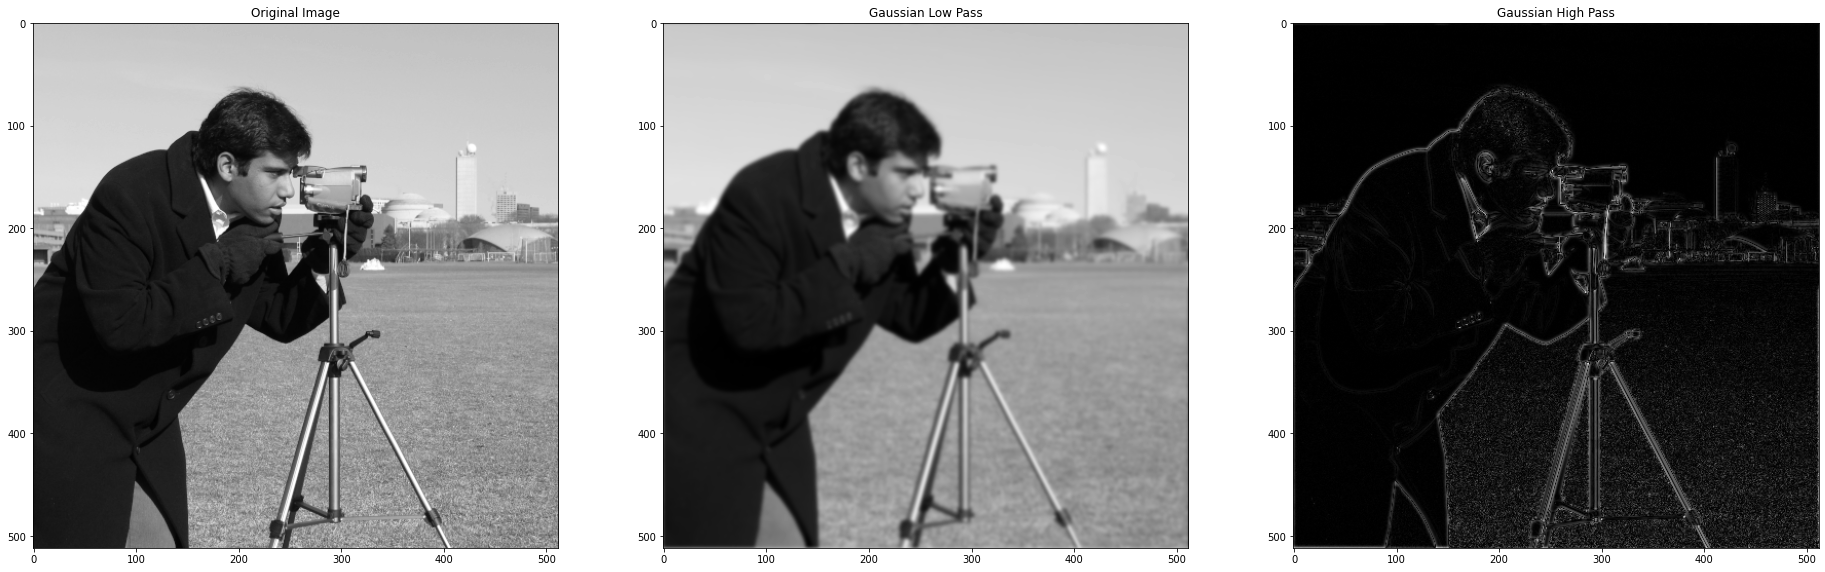

In [ ]:
# img = cv2.imread("left01.jpg", 0)
img = data.camera()

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

# Quanto menor for D0, maior será o nível de borramento
LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

# Quanto menor for D0, mais sinais de baixa frequencia passam 
HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

# Filtro de Butterworth

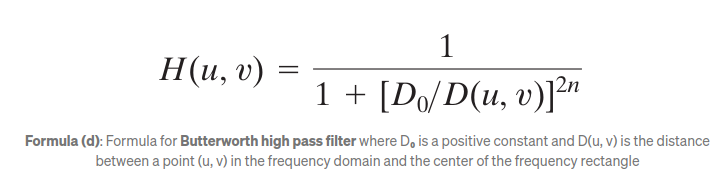
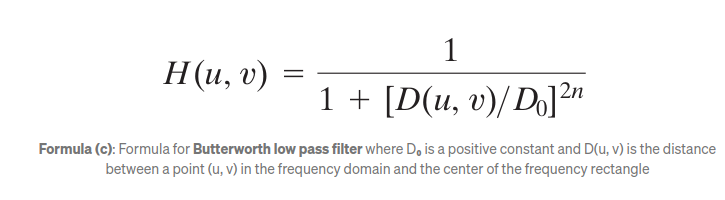

In [ ]:
# D0 é a distância da origem até a frequência de corte
# n é a ordem
def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

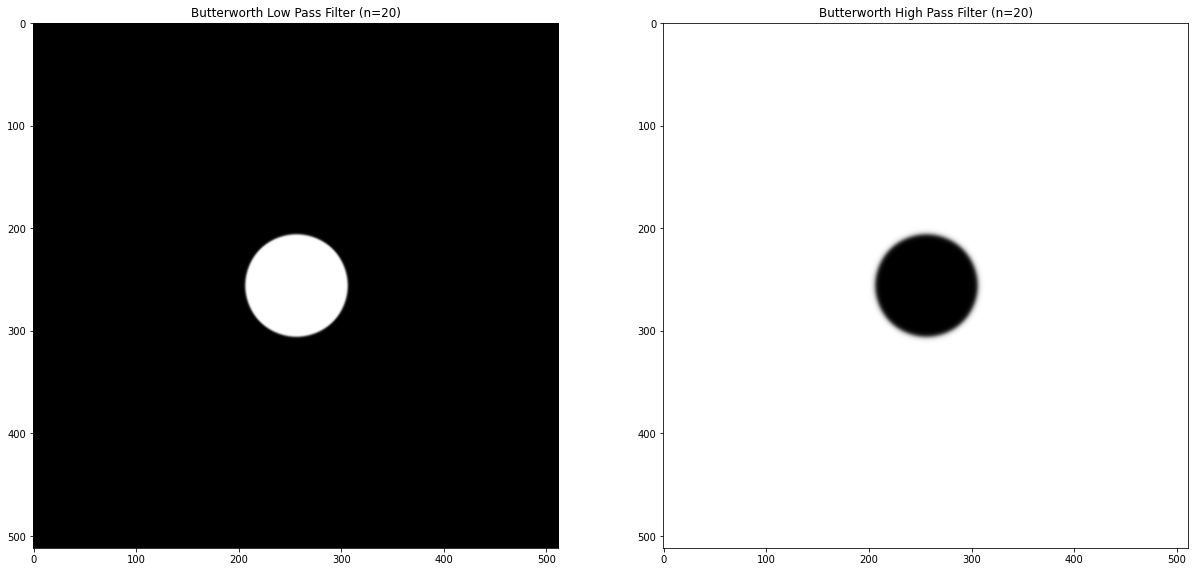

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,50)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

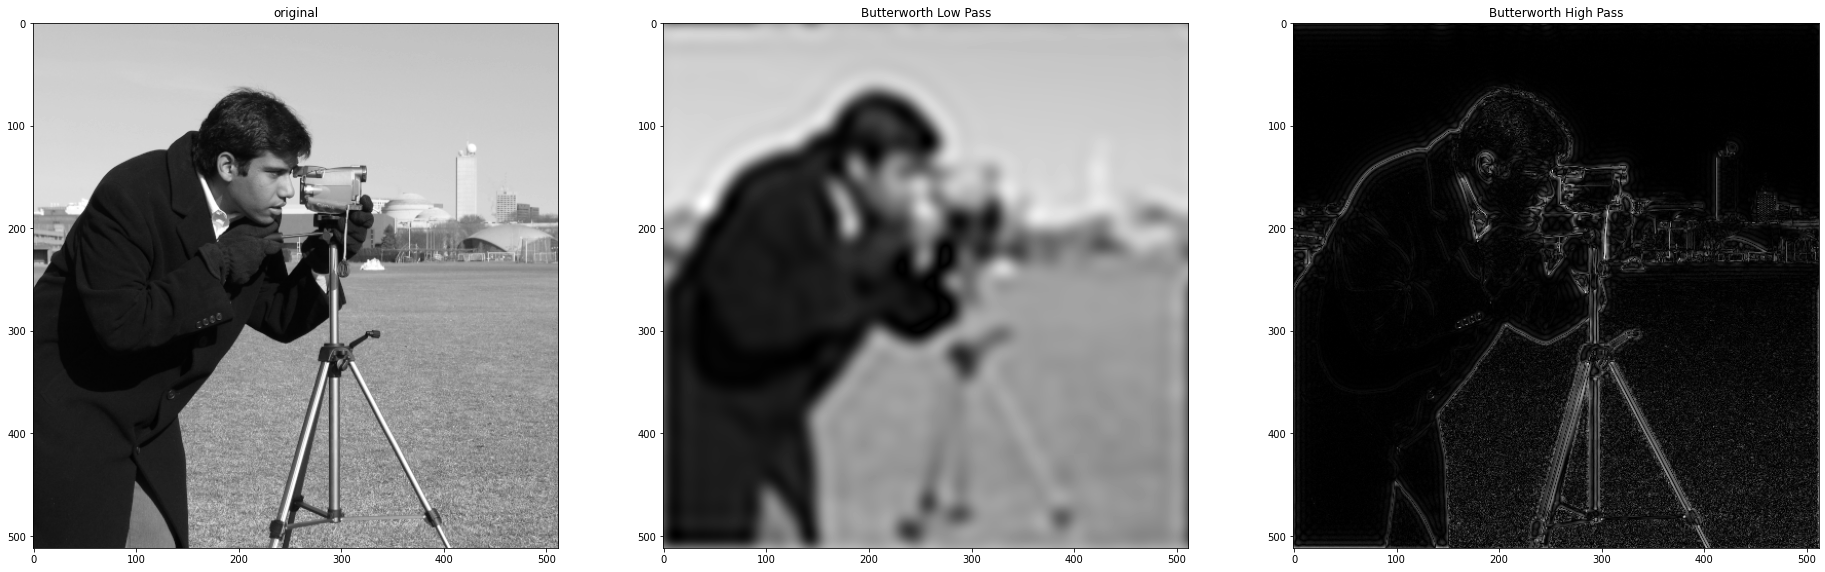

In [ ]:
# img = cv2.imread("left01.jpg", 0)
img = data.camera()

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)


plt.subplot(131), plt.imshow(img, "gray"), plt.title("original")

LowPassCenterB = center * butterworthLP(20,img.shape,5)
LowPassB = np.fft.ifftshift(LowPassCenterB)
inverse_LowPassB = np.fft.ifft2(LowPassB)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPassB), "gray"), plt.title("Butterworth Low Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass")


plt.show()

## skimage.filters.butterworth
https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.butterworth

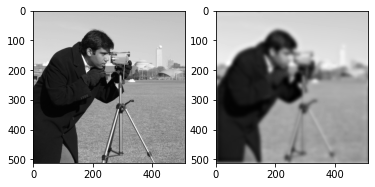

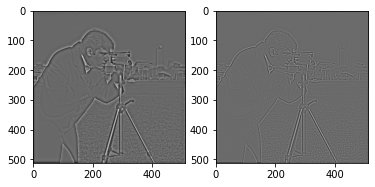

In [ ]:
from skimage import filters
from skimage.data import camera, astronaut
from skimage.filters import butterworth
import matplotlib.pyplot as plt

high_pass_a =  butterworth(camera(), cutoff_frequency_ratio=0.04, high_pass=False, order=2.0, channel_axis=None)
high_pass_b =  butterworth(camera(), cutoff_frequency_ratio=0.05, high_pass=True, order=2.0, channel_axis=None)
high_pass_c =  butterworth(camera(), cutoff_frequency_ratio=0.1, high_pass=True, order=2.0, channel_axis=None)

plt.subplot(1, 2, 1)
plt.imshow(camera(), cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(high_pass_a, cmap="gray")
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(high_pass_b, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(high_pass_c, cmap="gray")

plt.show()



# Aplicação: Blur detection in images (detecção de desfoque em imagens)
**Fonte:** https://www.pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

In [ ]:
"""Download da imagem de teste"""
from google.colab import files as FILE
import os
import requests

img_data = requests.get('https://gizmodo.uol.com.br/wp-content/blogs.dir/8/files/2019/03/foto-borrada.jpg').content

with open('blurred_img.jpg', 'wb') as handler:
    handler.write(img_data)

[INFO] Blurry (-0.6161)


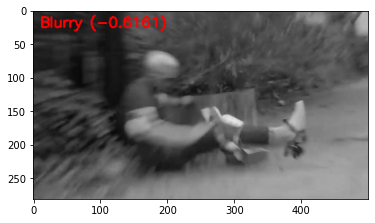

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2
from skimage.data import camera

def detect_blur_fft(image, size=60, thresh=10, vis=False):
	# grab the dimensions of the image and use the dimensions to
	# derive the center (x, y)-coordinates
	(h, w) = image.shape
	(cX, cY) = (int(w / 2.0), int(h / 2.0))
  # compute the FFT to find the frequency transform, then shift
	# the zero frequency component (i.e., DC component located at
	# the top-left corner) to the center where it will be more
	# easy to analyze
	fft = np.fft.fft2(image)
	fftShift = np.fft.fftshift(fft)
  # check to see if we are visualizing our output
	if vis:
		# compute the magnitude spectrum of the transform
		magnitude = 20 * np.log(np.abs(fftShift))
		# display the original input image
		(fig, ax) = plt.subplots(1, 2, )
		ax[0].imshow(image, cmap="gray")
		ax[0].set_title("Input")
		ax[0].set_xticks([])
		ax[0].set_yticks([])
		# display the magnitude image
		ax[1].imshow(magnitude, cmap="gray")
		ax[1].set_title("Magnitude Spectrum")
		ax[1].set_xticks([])
		ax[1].set_yticks([])
		# show our plots
		plt.show()

  # zero-out the center of the FFT shift (i.e., remove low
	# frequencies), apply the inverse shift such that the DC
	# component once again becomes the top-left, and then apply
	# the inverse FFT
	fftShift[cY - size:cY + size, cX - size:cX + size] = 0
	fftShift = np.fft.ifftshift(fftShift)
	recon = np.fft.ifft2(fftShift)
  # compute the magnitude spectrum of the reconstructed image,
	# then compute the mean of the magnitude values
	magnitude = 20 * np.log(np.abs(recon))
	mean = np.mean(magnitude)
	# the image will be considered "blurry" if the mean value of the
	# magnitudes is less than the threshold value
	return (mean, mean <= thresh)
 

# load the input image from disk, resize it, and convert it to
# grayscale
orig = cv2.imread('blurred_img.jpg')
orig = imutils.resize(orig, width=500)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

# apply our blur detector using the FFT
# image: Our input image for blur detection
# size: The size of the radius around the centerpoint of the image for which we will zero out the FFT shift
# thresh: A value which the mean value of the magnitudes (more on that later) will be compared to for determining whether an image is considered blurry or not blurry
# vis: A boolean indicating whether to visualize/plot the original input image and magnitude image using matplotlib
(mean, blurry) = detect_blur_fft(gray, size=60,	thresh=20, vis=-1 > 0)

# draw on the image, indicating whether or not it is blurry
image = np.dstack([gray] * 3)
color = (255, 0, 0) if blurry else (0, 118, 0)
text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
text = text.format(mean)
cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	color, 2)
print("[INFO] {}".format(text))
# show the output image
# cv2.imshow("Output", image)
# cv2.waitKey(0)
plt.imshow(image)
plt.show()


[INFO] Kernel: 1, Result: Not Blurry (23.7299)


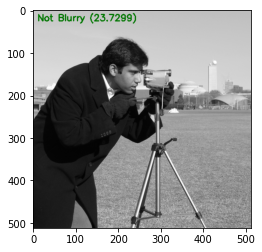

[INFO] Kernel: 3, Result: Blurry (16.8077)


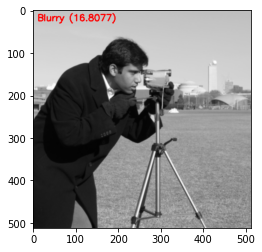

[INFO] Kernel: 5, Result: Blurry (12.7543)


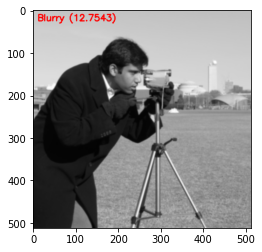

[INFO] Kernel: 7, Result: Blurry (6.8753)


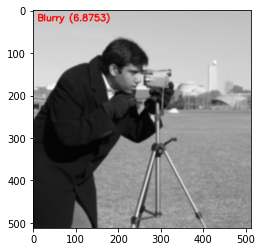

[INFO] Kernel: 9, Result: Blurry (2.3524)


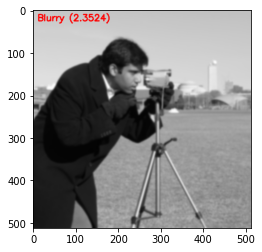

[INFO] Kernel: 11, Result: Blurry (-3.1294)


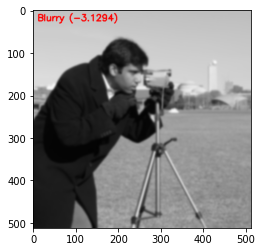

[INFO] Kernel: 13, Result: Blurry (-7.2259)


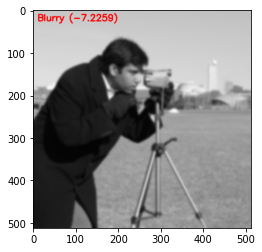

[INFO] Kernel: 15, Result: Blurry (-11.3057)


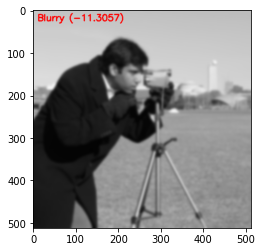

[INFO] Kernel: 17, Result: Blurry (-14.2518)


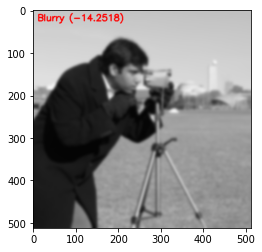

[INFO] Kernel: 19, Result: Blurry (-15.7467)


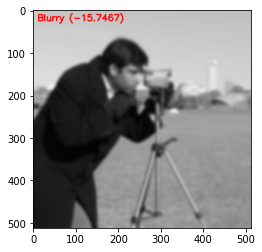

[INFO] Kernel: 21, Result: Blurry (-16.3791)


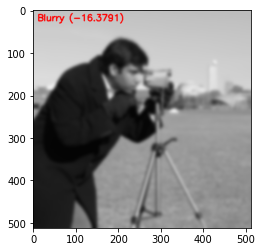

[INFO] Kernel: 23, Result: Blurry (-16.4209)


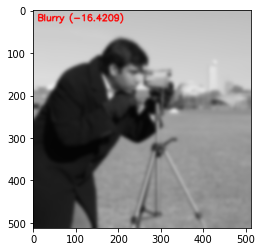

[INFO] Kernel: 25, Result: Blurry (-16.4771)


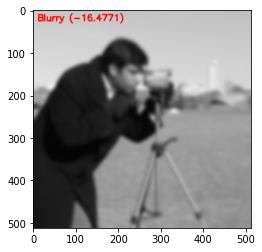

[INFO] Kernel: 27, Result: Blurry (-16.6367)


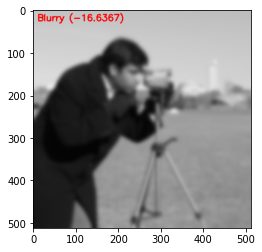

[INFO] Kernel: 29, Result: Blurry (-16.9965)


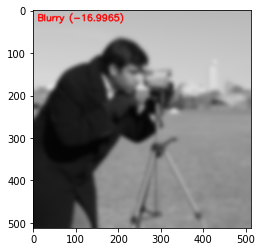

In [ ]:
# check to see if are going to test our FFT blurriness detector using
# various sizes of a Gaussian kernel
# if args["test"] > 0:
from skimage.data import camera

# loop over various blur radii
for radius in range(1, 30, 2):
  # clone the original grayscale image
  image = camera()
  # check to see if the kernel radius is greater than zero
  if radius > 0:
    # blur the input image by the supplied radius using a
    # Gaussian kernel
    image = cv2.GaussianBlur(image, (radius, radius), 0)
    # apply our blur detector using the FFT
    (mean, blurry) = detect_blur_fft(image, size=60,
      thresh=20, vis=-1 > 0)
    # draw on the image, indicating whether or not it is
    # blurry
    image = np.dstack([image] * 3)
    color = (255, 0, 0) if blurry else (0, 118, 0)
    text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
    text = text.format(mean)
    cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
      0.7, color, 2)
    print("[INFO] Kernel: {}, Result: {}".format(radius, text))
  # show the image
  # cv2.imshow("Test Image", image)
  # cv2.waitKey(0)
  plt.imshow(image)
  plt.show()